In [351]:
# Apurva Shah, 705595011, Psych 186B
# Homework 3

# General Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import statistics

In [352]:
seed_value = 40
random.seed(seed_value)

In [353]:
# Utility Functions for Lab

class VectorTools():
    def __init__(self):
        pass

    def generate_vector(self, length):
        # Function to generate a random vector of specified length 
        vector = np.random.randn(length)
        return vector
    
    def normalize_mean(self, vector):
        # Function to take vector and normalize its mean to zero
        mean = np.mean(vector)
        return vector - mean
    
    def normalize_vector(self, vector):
        # Function to normalize a vector to unit length
        norm = np.linalg.norm(vector)
        return vector / norm if norm != 0 else vector
        
    def calculate_length(self, vector):
        # Calculates the length of a vector given a vector
        sum = 0
        for i in vector:
            sum += i**2
        return math.sqrt(sum)
    
    def calculate_dot_product(self, v1, v2):
        # Calculates the dot product between two vectors
        dot_product = 0

        # Vectors are not the same dimension
        if len(v1) != len(v2):
            raise Exception()

        for i in range(0, len(v1)):
            dot_product += v1[i]*v2[i]
        
        return dot_product

vmod = VectorTools()

In [354]:
def generate_vector_pairs(num_pairs, vector_length):
    # Generate many pairs of normalized random vectors
    pairs = []
    for i in range(num_pairs):
        fi = vmod.generate_vector(vector_length)
        gi = vmod.generate_vector(vector_length)
        fi_normalized = vmod.normalize_vector(fi)
        gi_normalized = vmod.normalize_vector(gi)
        pairs.append((fi_normalized, gi_normalized))
    return pairs

### Part A

In [355]:
def widrow_hoff_update(A, f, g, k):
    g_prime = A.dot(f)
    error = g - g_prime
    delta_A = k * np.outer(error, f)
    A += delta_A
    return A, np.linalg.norm(error)

def test_connectivity_matrix_with_averages(A, vector_pairs, num_test_vectors):
    total_cosine_similarity = 0
    total_length_g_prime = 0
    for fi, gi in vector_pairs:
        g_prime = A.dot(fi)
        cosine_similarity = np.dot(gi, g_prime) / (np.linalg.norm(gi) * np.linalg.norm(g_prime))
        total_cosine_similarity += cosine_similarity
        total_length_g_prime += np.linalg.norm(g_prime)
    
    avg_cosine_similarity = total_cosine_similarity / len(vector_pairs)
    avg_length_g_prime = total_length_g_prime / len(vector_pairs)
    
    test_vector_lengths = []
    for _ in range(num_test_vectors):
        hi = vmod.generate_vector(len(A))
        hi_prime = A.dot(hi)
        test_vector_lengths.append(np.linalg.norm(hi_prime))
    
    avg_length_hi_prime = np.mean(test_vector_lengths)
    
    return avg_cosine_similarity, avg_length_g_prime, avg_length_hi_prime


In [356]:
def run_experiment(num_pairs, dimensions=100, iterations=1000, epsilon=1/1000, decreasing_k=False):
    vector_pairs = generate_vector_pairs(num_pairs, dimensions)
    A = np.zeros((dimensions, dimensions))
    errors = []

    for iteration in range(1, iterations + 1):
        # Select a random pair for training
        f, g = vector_pairs[np.random.randint(0, num_pairs)]
        
        # Adjust k based on the iteration if decreasing_k is True
        if decreasing_k:
            k = (1 / (np.dot(f, f) - epsilon)) / iteration
        else:
            k = 0.1  # constant k value
        
        A, error = widrow_hoff_update(A, f, g, k)
        errors.append(error)
    
    avg_cosine_similarity, avg_length_g_prime, avg_length_hi_prime = test_connectivity_matrix_with_averages(A, vector_pairs, 50)
    print("Testing ", num_pairs, " Pairs of Vectors")
    print(f"Average Cosine Similarity: {avg_cosine_similarity:.4f}")
    print(f"Average Length of g': {avg_length_g_prime:.4f}")
    print(f"Average Length of hi': {avg_length_hi_prime:.4f}")
    print("\n")  
    
    # Plotting the error over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label=f'Decreasing k: {decreasing_k}, numpair: {num_pairs}')
    plt.xlabel('Iterations')
    plt.ylabel('Error Magnitude')
    plt.title('Error Magnitude Over Iterations')
    plt.legend()
    plt.show()

Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.9982
Average Length of g': 0.9613
Average Length of hi': 4.9211




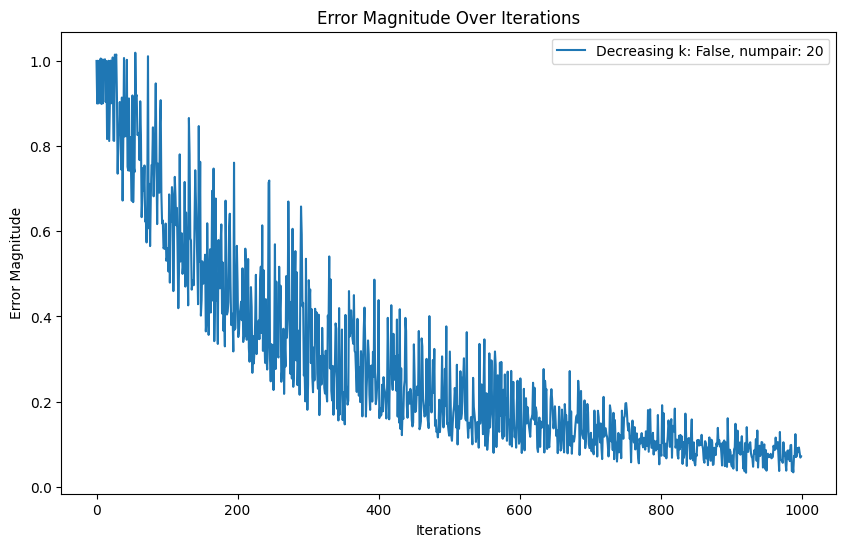

Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.9663
Average Length of g': 0.8369
Average Length of hi': 5.5766




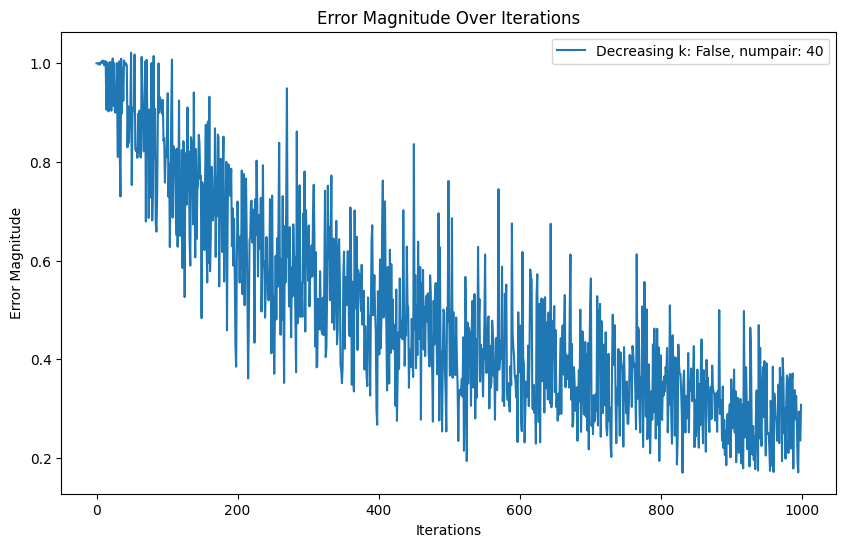

Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.9184
Average Length of g': 0.7302
Average Length of hi': 5.7008




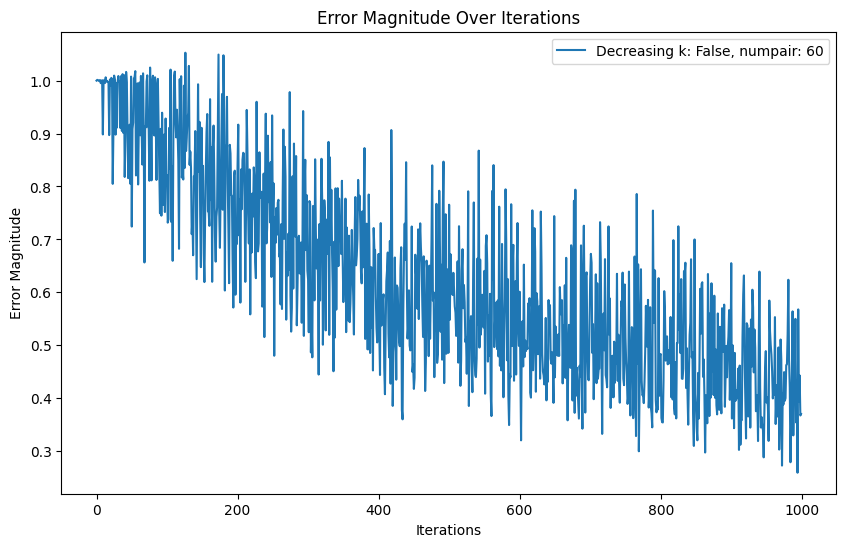

Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.8541
Average Length of g': 0.6584
Average Length of hi': 5.4238




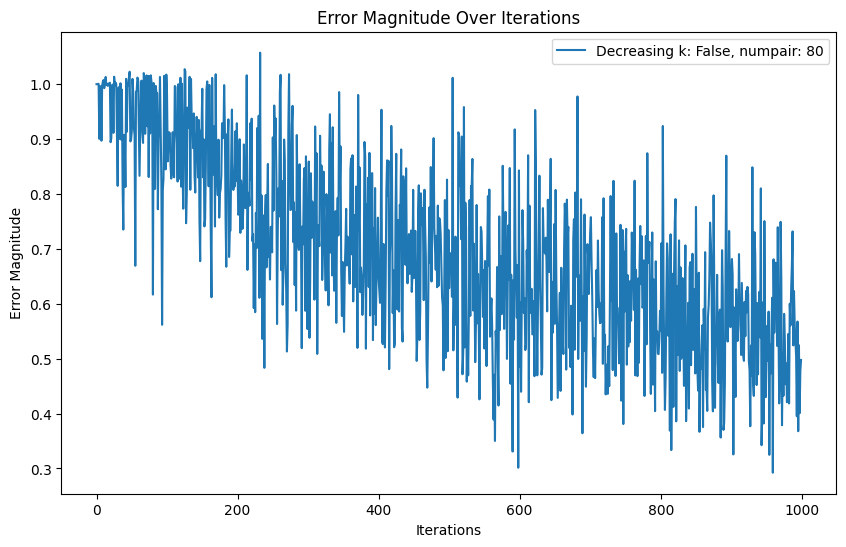

In [357]:
# Constant K Value
run_experiment(20, decreasing_k=False)
run_experiment(40, decreasing_k=False)
run_experiment(60, decreasing_k=False)
run_experiment(80, decreasing_k=False)

Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.8883
Average Length of g': 0.3410
Average Length of hi': 1.6940




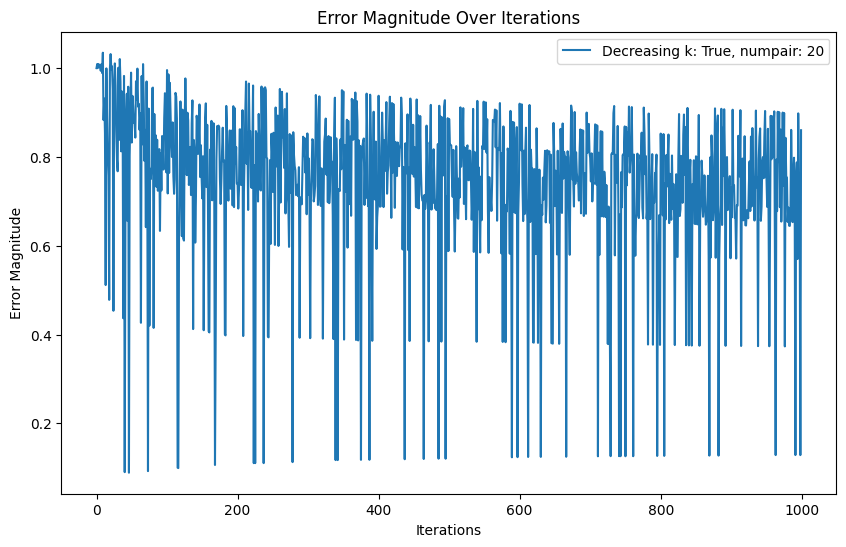

Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.6532
Average Length of g': 0.2208
Average Length of hi': 1.4205




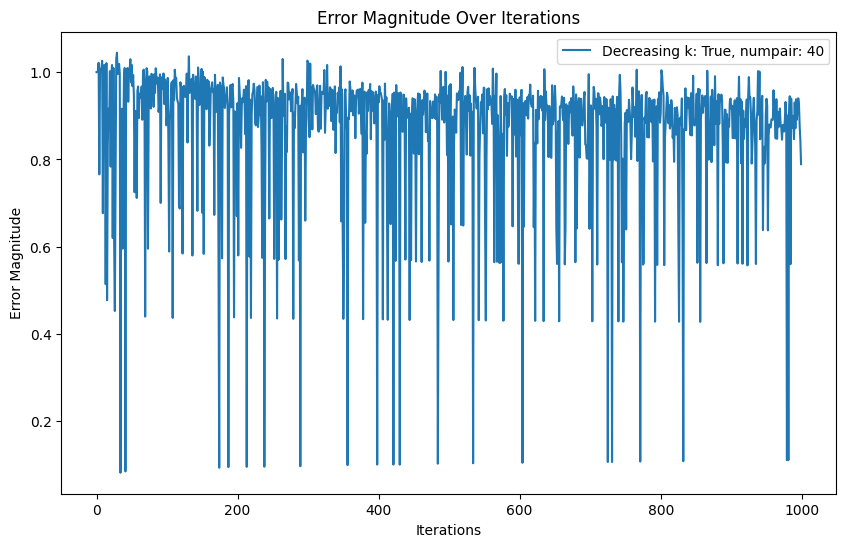

Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.5329
Average Length of g': 0.1846
Average Length of hi': 1.4108




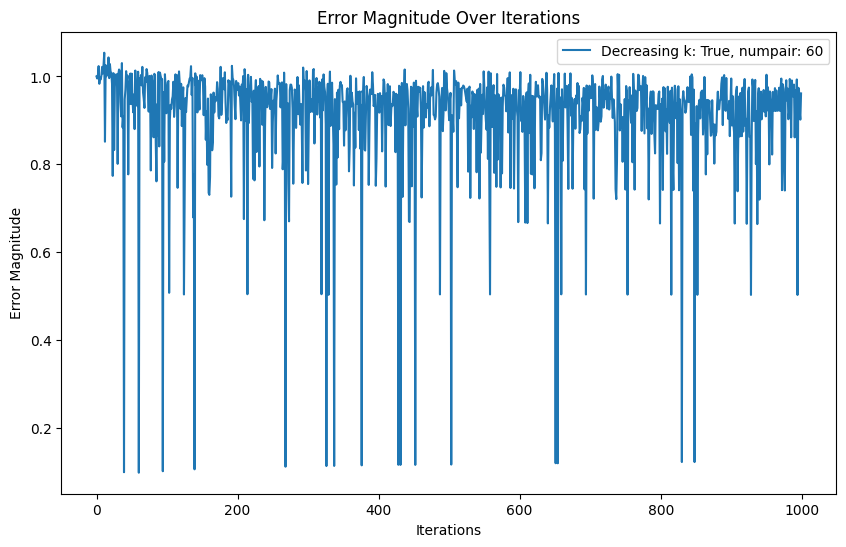

Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.4545
Average Length of g': 0.1644
Average Length of hi': 1.2755




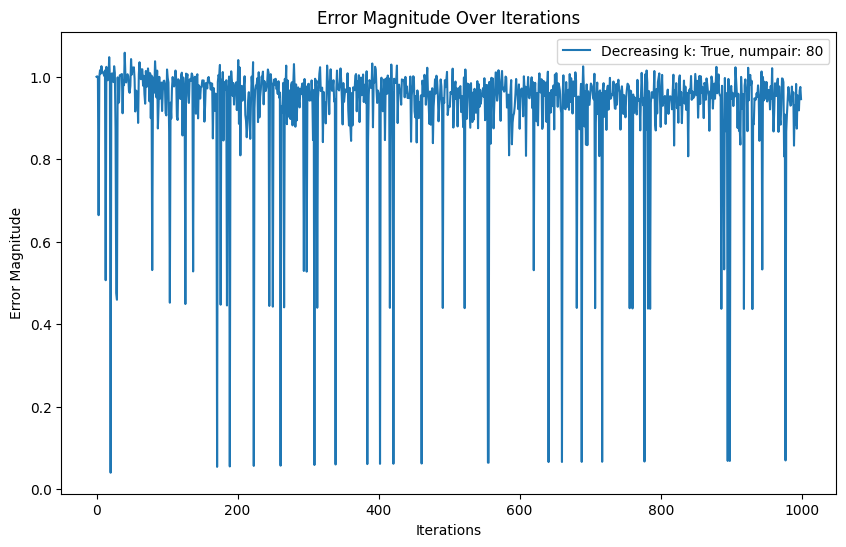

In [358]:
# Decreasing K Value

run_experiment(20, decreasing_k=True)
run_experiment(40, decreasing_k=True)
run_experiment(60, decreasing_k=True)
run_experiment(80, decreasing_k=True)

### Part B

calculate the difference between errors between each iteration and graph it until it reaches 0.1

have to do segment of things

 for this problem when I looked at this in class, The person that was looking at basically what they did was they compare the errors to the errors before them and were able to just like subtracted and divided by the total to see the percent change and only when their Threshold equaled around 0.1 They stopped the iterations. The curve should look like an L. 

In [359]:
def run_convergence_experiment(num_pairs, dimensions=100, iterations=1000, epsilon=1/1000, decreasing_k=False):
    vector_pairs = generate_vector_pairs(num_pairs, dimensions)
    A = np.zeros((dimensions, dimensions))
    errors = []
    convergence_iteration = None

    for iteration in range(1, iterations + 1):
        f, g = vector_pairs[np.random.randint(0, num_pairs)]
        
        if decreasing_k:
            k = (1 / (np.dot(f, f) - epsilon)) / iteration
        else:
            k = 0.1  # Constant k value

        A, error = widrow_hoff_update(A, f, g, k)
        errors.append(error)

        # Check for convergence only after a reasonable number of iterations
        if iteration > 800: 
            relative_error_decrease = (errors[-2] - errors[-1]) / errors[-2] * 100  # This is where we check for less than 1% decrease
            
            # If the relative decrease is less than 1%, we consider the system to have converged
            if 0 <= relative_error_decrease < 1:
                convergence_iteration = iteration
                break
    
    avg_cosine_similarity, avg_length_g_prime, avg_length_hi_prime = test_connectivity_matrix_with_averages(A, vector_pairs, 50)
    print("Testing ", num_pairs, " Pairs of Vectors")
    print(f"Average Cosine Similarity: {avg_cosine_similarity:.4f}")
    print(f"Average Length of g': {avg_length_g_prime:.4f}")
    print(f"Average Length of hi': {avg_length_hi_prime:.4f}")
    print("\n")  

    # Plotting the error over iterations, highlighting the convergence point if identified
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label='Error Magnitude')
    if convergence_iteration:
        plt.axvline(convergence_iteration, color='r', linestyle='--', label=f'Convergence at Iteration {convergence_iteration}')
    plt.xlabel('Iteration')
    plt.ylabel('Error Magnitude')
    plt.title(f'Error Magnitude and Convergence for {num_pairs} Pairs')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return convergence_iteration if convergence_iteration else "Did not converge within the given iterations"


Running convergence experiment for 20 vector pairs with constant k=0.1
Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.9982
Average Length of g': 0.9700
Average Length of hi': 4.6415




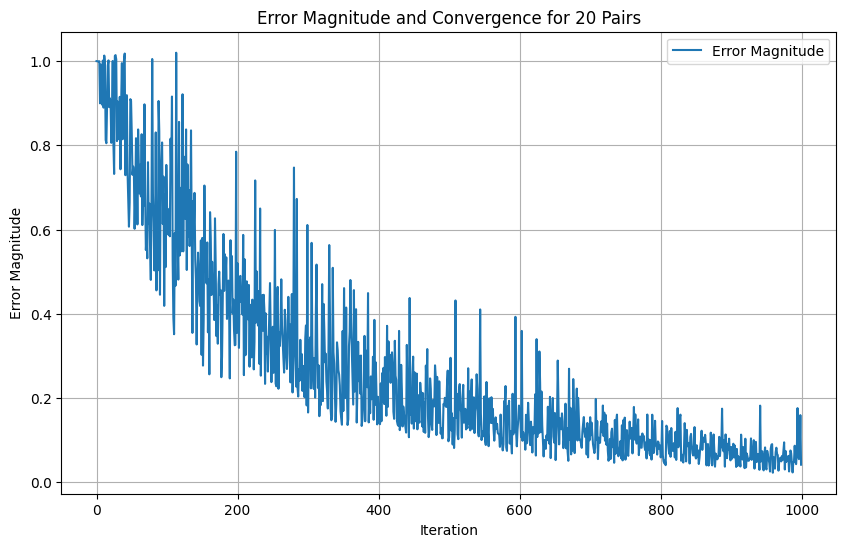

Convergence achieved at iteration: Did not converge within the given iterations

Running convergence experiment for 40 vector pairs with constant k=0.1
Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.9660
Average Length of g': 0.8035
Average Length of hi': 5.0700




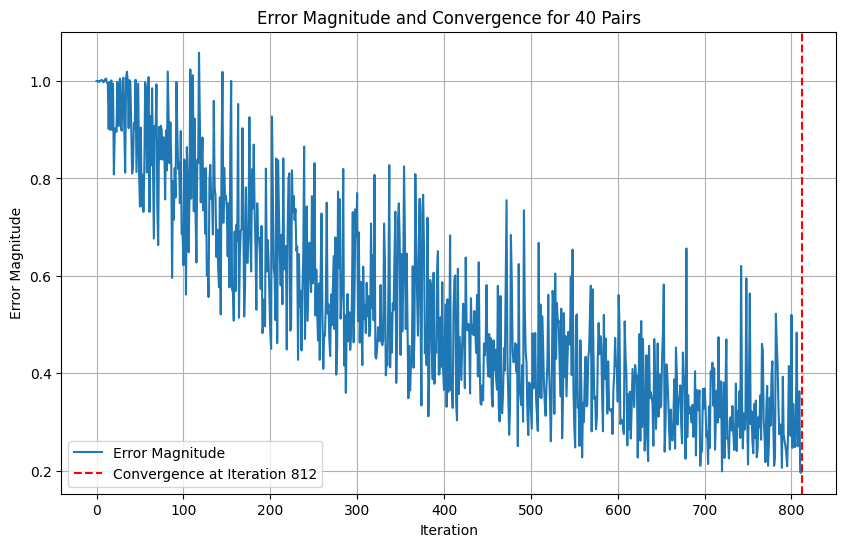

Convergence achieved at iteration: 812

Running convergence experiment for 60 vector pairs with constant k=0.1
Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.9033
Average Length of g': 0.7121
Average Length of hi': 5.3197




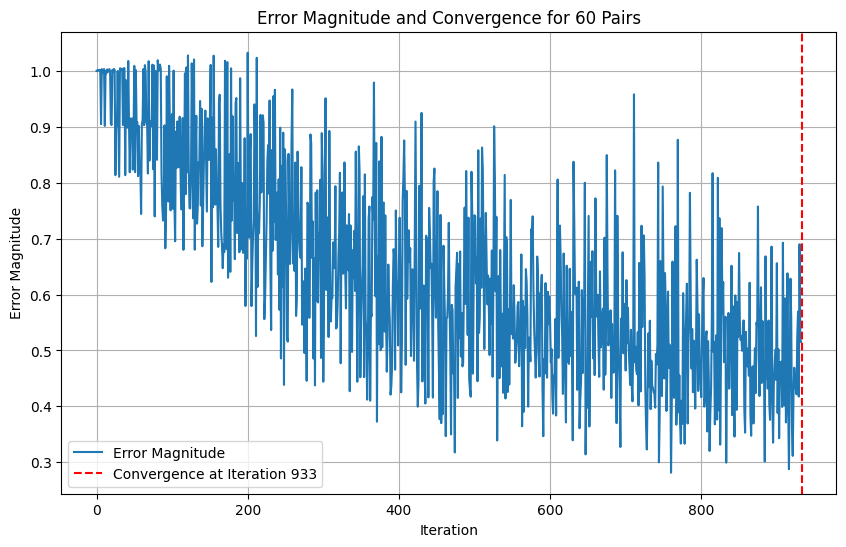

Convergence achieved at iteration: 933

Running convergence experiment for 80 vector pairs with constant k=0.1
Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.8351
Average Length of g': 0.6036
Average Length of hi': 4.9690




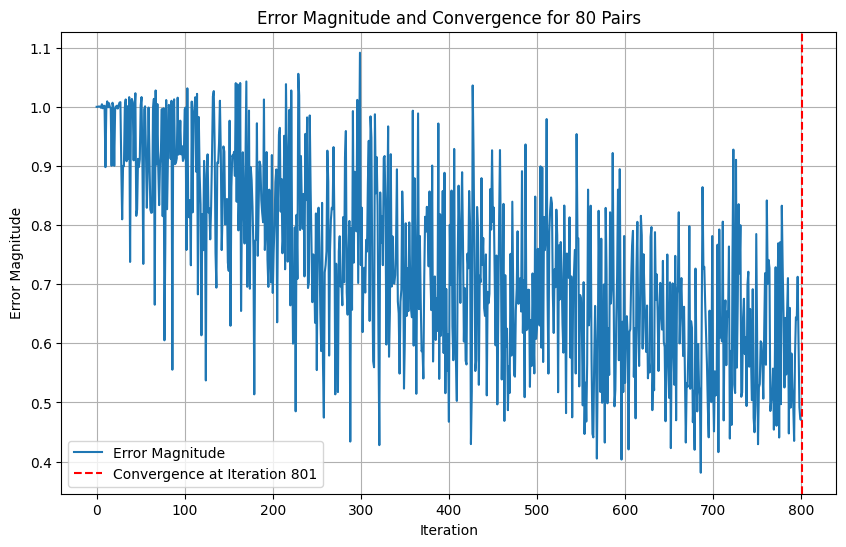

Convergence achieved at iteration: 801



In [360]:
pair_counts = [20, 40, 60, 80]
for count in pair_counts:
    print(f"Running convergence experiment for {count} vector pairs with constant k=0.1")
    convergence_iteration = run_convergence_experiment(count, decreasing_k=False)
    print(f"Convergence achieved at iteration: {convergence_iteration}\n")


### Part C

In [361]:
def assess_deterioration(vector_pairs, dimensions=100, epsilon=1/1000, threshold=0.1):
    """
    Assess the deterioration of the system by comparing the similarity of outputs
    generated by new, random input vectors to the expected outputs of stored vectors.
    The threshold defines how close the outputs need to be to consider it a sign of deterioration.
    """
    A = np.zeros((dimensions, dimensions))
    deterioration_points = []

    for f, g in vector_pairs:
        A, _ = widrow_hoff_update(A, f, g, k=0.1)  # Update A using Widrow-Hoff with constant k for simplicity

    # Test with new input vectors to assess deterioration
    for _ in range(len(vector_pairs)):
        new_f = vmod.generate_vector(dimensions)
        new_g_prime = A.dot(new_f)
        
        # Compare new_g_prime to each stored g to find the maximum similarity
        similarities = [np.dot(new_g_prime, g) / (np.linalg.norm(new_g_prime) * np.linalg.norm(g)) for _, g in vector_pairs]
        max_similarity = max(similarities)
        
        # Check if the maximum similarity exceeds the threshold
        if max_similarity > threshold:
            deterioration_points.append(max_similarity)
    
    avg_cosine_similarity, avg_length_g_prime, avg_length_hi_prime = test_connectivity_matrix_with_averages(A, vector_pairs, 50)
    print("Testing ", len(vector_pairs), " Pairs of Vectors")
    print(f"Average Cosine Similarity: {avg_cosine_similarity:.4f}")
    print(f"Average Length of g': {avg_length_g_prime:.4f}")
    print(f"Average Length of hi': {avg_length_hi_prime:.4f}")
    print("\n")

    return deterioration_points

def run_deterioration_experiments(pair_counts, dimensions=100):
    results = {}
    for count in pair_counts:
        vector_pairs = generate_vector_pairs(count, dimensions)
        deterioration = assess_deterioration(vector_pairs, dimensions)
        results[count] = deterioration

    # Analyze and visualize the results
    for count, deterioration in results.items():
        print(f"{count} pairs: Deterioration points - {deterioration}")
    
    # Visualization or further analysis could be added here based on the results

pair_counts = [100, 200, 300, 400]  # Testing with larger numbers of vector pairs
run_deterioration_experiments(pair_counts)


Testing  100  Pairs of Vectors
Average Cosine Similarity: 0.7322
Average Length of g': 0.1322
Average Length of hi': 0.9606


Testing  200  Pairs of Vectors
Average Cosine Similarity: 0.5907
Average Length of g': 0.1509
Average Length of hi': 1.2959


Testing  300  Pairs of Vectors
Average Cosine Similarity: 0.5109
Average Length of g': 0.1688
Average Length of hi': 1.5287


Testing  400  Pairs of Vectors
Average Cosine Similarity: 0.4551
Average Length of g': 0.1795
Average Length of hi': 1.6676


100 pairs: Deterioration points - [0.28726037260852444, 0.334318381507097, 0.4010505624007558, 0.38358803152683907, 0.29773010884134266, 0.40615228634995193, 0.4141418881104611, 0.31516639056817286, 0.29898125044710094, 0.3536968005074484, 0.356494353769116, 0.35179026374354416, 0.2895324558953589, 0.41506863846716796, 0.3722228090201659, 0.4607521564809654, 0.4247653296865364, 0.3031666830427994, 0.4391937109354043, 0.275746052270037, 0.4565870322984095, 0.3168787659238792, 0.33181837899253

### 

### Part D

In [362]:
def sequential_widrow_hoff_learning(vector_pairs, k=0.1, order='forward', dimensions=100):
    A = np.zeros((dimensions, dimensions))
    errors = []
    
    if order == 'backward':
        vector_pairs = vector_pairs[::-1]  # Reverse the order of vector pairs
    
    for f, g in vector_pairs:
        A, error = widrow_hoff_update(A, f, g, k)
        errors.append(error)
    
    return A, errors

import matplotlib.pyplot as plt

def run_sequential_experiment(num_pairs, k=0.1, dimensions=100, order='forward'):
    vector_pairs = generate_vector_pairs(num_pairs, dimensions)
    
    # Run the learning process with the specified order
    A, errors = sequential_widrow_hoff_learning(vector_pairs, k, order, dimensions)

    # Optional: Compute and print average cosine similarity and lengths for additional analysis
    avg_cosine_similarity, avg_length_g_prime, avg_length_hi_prime = test_connectivity_matrix_with_averages(A, vector_pairs, 50)
    print("Testing ", len(vector_pairs), " Pairs of Vectors")
    print(f"Average Cosine Similarity: {avg_cosine_similarity:.4f}")
    print(f"Average Length of g': {avg_length_g_prime:.4f}")
    print(f"Average Length of hi': {avg_length_hi_prime:.4f}")
    
    print(f"Order: {order}, Testing {num_pairs} Pairs of Vectors")
    print(f"Final Error: {errors[-1]:.4f}\n")

    # Plotting the error over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label=f'Order: {order}')
    plt.xlabel('Iteration')
    plt.ylabel('Error Magnitude')
    plt.title(f'Error Magnitude Over Iterations for {num_pairs} Pairs ({order})')
    plt.legend()
    plt.grid(True)
    plt.show()

    return A



Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.9294
Average Length of g': 0.1053
Average Length of hi': 0.4488
Order: forward, Testing 20 Pairs of Vectors
Final Error: 0.9960



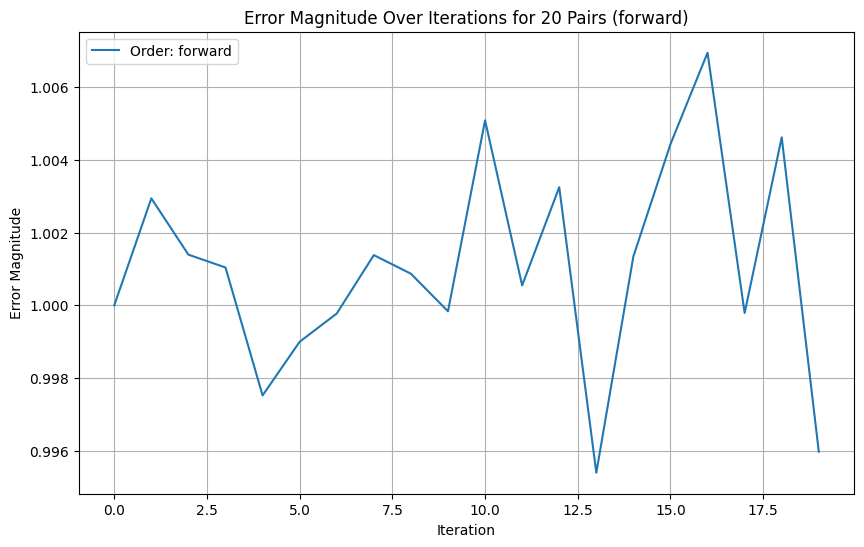

Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.8503
Average Length of g': 0.1124
Average Length of hi': 0.6020
Order: forward, Testing 40 Pairs of Vectors
Final Error: 1.0050



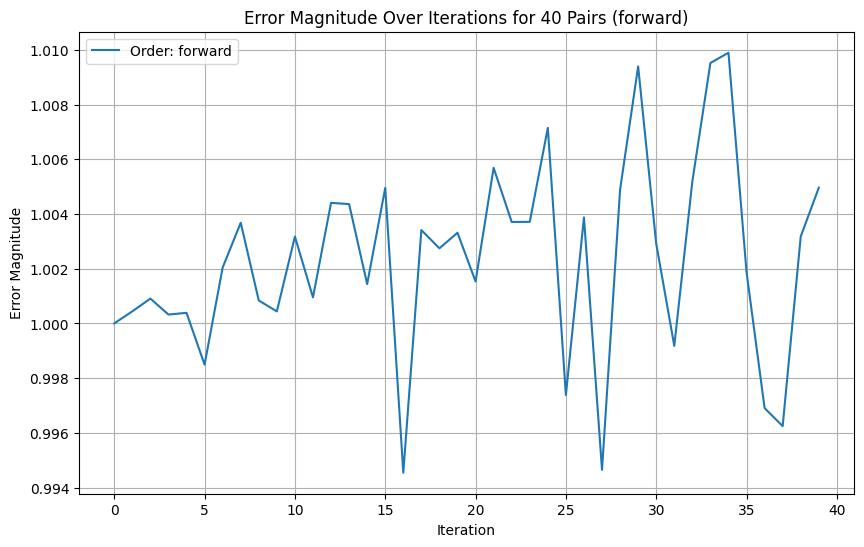

Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.8078
Average Length of g': 0.1178
Average Length of hi': 0.7419
Order: forward, Testing 60 Pairs of Vectors
Final Error: 1.0020



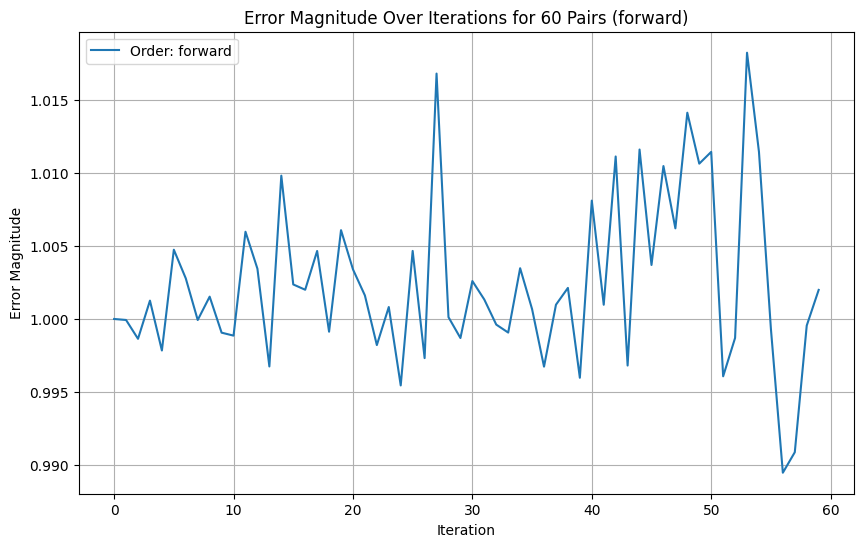

Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.7619
Average Length of g': 0.1255
Average Length of hi': 0.8559
Order: forward, Testing 80 Pairs of Vectors
Final Error: 0.9928



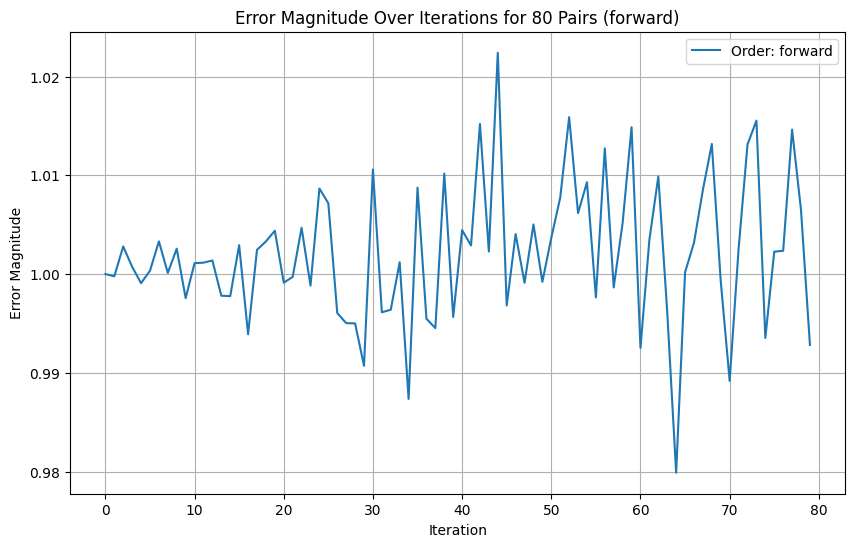

In [363]:
# Forwards
k = 0.1 
pair_counts = [20, 40, 60, 80]
for num_pairs in pair_counts:
    run_sequential_experiment(num_pairs, k, order='forward')

Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.9331
Average Length of g': 0.1063
Average Length of hi': 0.4217
Order: backward, Testing 20 Pairs of Vectors
Final Error: 0.9971



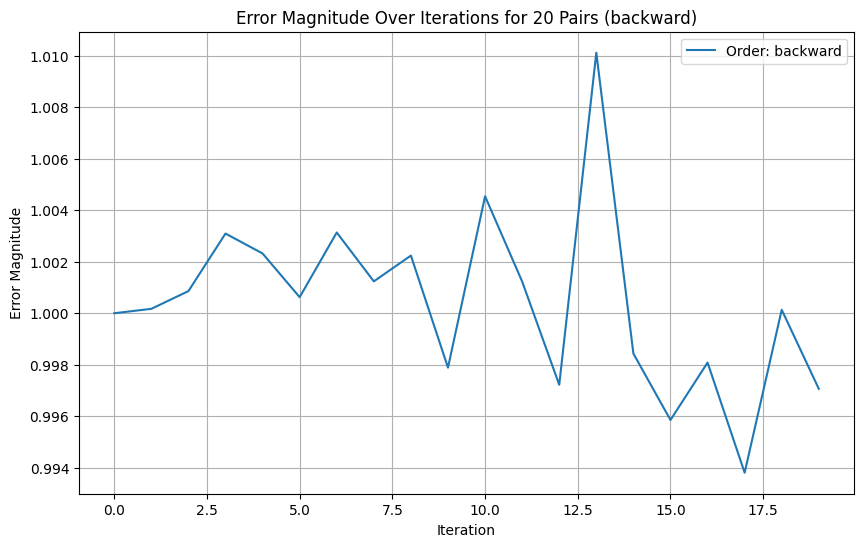

Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.8513
Average Length of g': 0.1139
Average Length of hi': 0.5882
Order: backward, Testing 40 Pairs of Vectors
Final Error: 1.0074



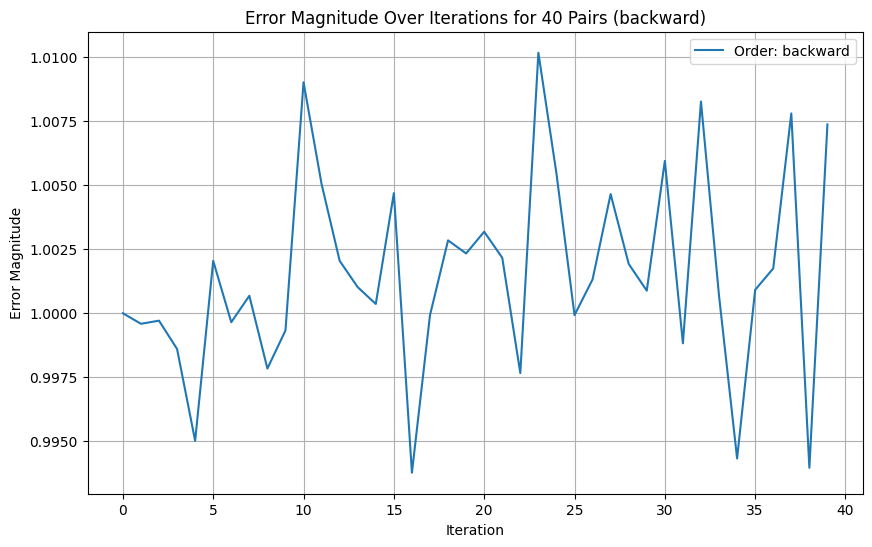

Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.8145
Average Length of g': 0.1205
Average Length of hi': 0.7663
Order: backward, Testing 60 Pairs of Vectors
Final Error: 1.0034



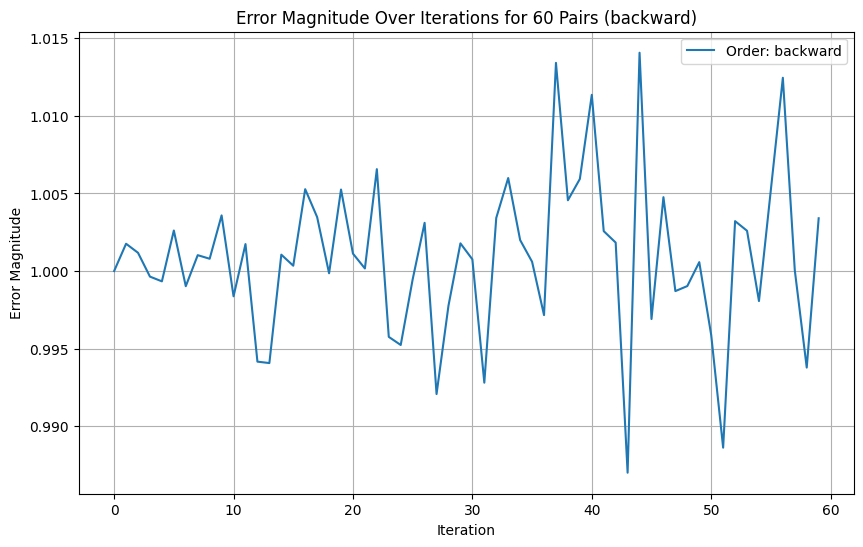

Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.7651
Average Length of g': 0.1244
Average Length of hi': 0.8630
Order: backward, Testing 80 Pairs of Vectors
Final Error: 1.0058



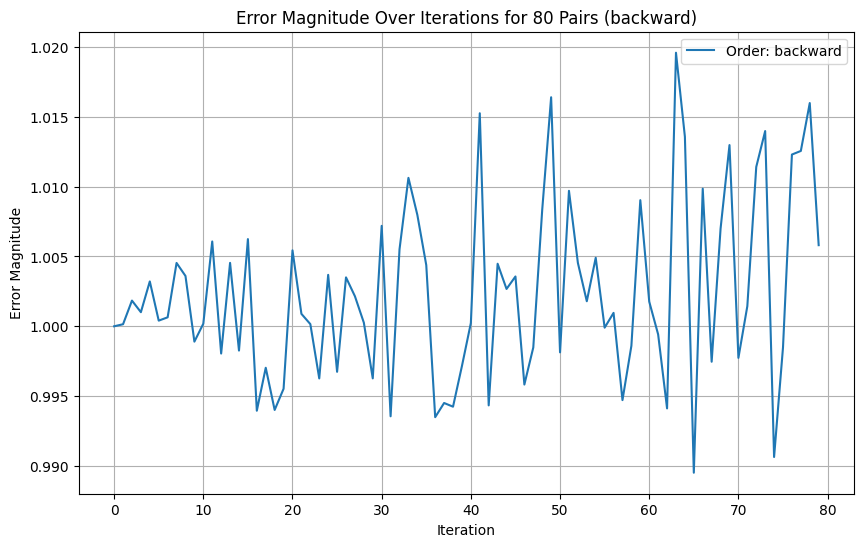

In [364]:
# Backwards
k = 0.1 
pair_counts = [20, 40, 60, 80]

for num_pairs in pair_counts:
    run_sequential_experiment(num_pairs, k, order='backward')